In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('chat.csv')

# Tarih sütununu datetime formatına çevirelim (İleride lazım olacak)
# format='%d.%m.%Y' -> Gün.Ay.Yıl formatına uygun
df['Tarih_Formatli'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

# Verinin ilk 5 satırını görelim
print("Veri Seti Önizlemesi:")
display(df.head())

Veri Seti Önizlemesi:


,Tarih,Saat,Gonderen,Mesaj,Tarih_Formatli
0,16.10.2024,23:10:31,Hümeyra Demirbaş ÖNDER Mars,"Hayırlı akşamlar, dün akşam bir form atacağını...",2024-10-16
1,16.10.2024,23:12:30,Mustafa Özgör,"Hayırlı akşamlar Hümeyra, çok teşekkürler. Unu...",2024-10-16
2,16.10.2024,23:14:55,Hümeyra Demirbaş ÖNDER Mars,Aa tamamdır sorun yok,2024-10-16
3,17.10.2024,16:55:25,Mustafa Özgör,https://gamma.itu.edu.tr/ Hayırlı akşamlar Hüm...,2024-10-17
4,17.10.2024,17:17:59,Mustafa Özgör,Medya ile uğraşmak isteyen arkadaşların olurs...,2024-10-17


### mesaj istatistikleri

In [ ]:
# 2. Kim Kaç Mesaj Atmış?
msg_counts = df['Gonderen'].value_counts().reset_index()
msg_counts.columns = ['Kişi', 'Mesaj Sayısı']

print("\n--- Mesaj İstatistikleri ---")
display(msg_counts)


--- Mesaj İstatistikleri ---


,Kişi,Mesaj Sayısı
0,Hümeyra Demirbaş ÖNDER Mars,7766
1,Mustafa Özgör,7680


### Kim hangi kelimeyi en çok kullanmış

In [9]:
import re
from collections import Counter

# 1. Genişletilmiş Etkisiz Kelimeler (Stop Words)
# "değil", "var", "yok", "olsun" gibi kelimeleri de ekledik.
stop_words = set([
    "bir", "ve", "ile", "de", "da", "bu", "şu", "o", "ben", "sen", "biz", "siz", "onlar",
    "mı", "mi", "mu", "mü", "ama", "fakat", "lakin", "ancak", "için", "gibi", "kadar",
    "diye", "yok", "var", "ne", "nasıl", 'neden', 'niye', 'şey', 'yani', 'zaten',
    'tamam', 'peki', 'evet', 'hayır', 'olur', 'olmaz', 'iyi', 'güzel', 'kötü',
    'bunu', 'şunu', 'onu', 'bana', 'sana', 'ona', 'şimdi', 'sonra', 'önce', 'daha',
    'en', 'çok', 'az', 'biraz', 'bile', 'ise', 'tüm', 'her', 'hiç', 'kendi',
    'sadece', 'veya', 'ya', 'hem', 'böyle', 'öyle', 'zaman', 'olsun', 'olsa',
    'hani', 'işte', 'falan', 'filan', 'tmm', 'ok', 'oke', 'aynen', 'tabii', 'tabi',
    'değil', 'misin', 'musun', 'bence', 'sence', 'galiba', 'sanırım', 'bide',
    'artık', 'hala', 'diğer', 'mesaj', 'kanka', 'abi', 'abla', 'di', 'bi'
])

In [12]:
# 2. Genişletilmiş Sistem Filtreleri
# Silinen ve iletilen mesajları da yakalayacağız.
system_filters = [
    "dahil edilmedi",       
    "uçtan uca şifreli",    
    "araması",              
    "kişisini ekledi",      
    "grubu oluşturdu",
    "gruptan ayrıldı",
    "tanımı değişti",       
    "sildi",                # "Bu mesajı sildiniz"
    "silindi",              # "Bu mesaj silindi"
    "düzenlendi",
    "iletilen",             # "İletilen mesaj"
    "konumu paylaştı",      
    "kartvizit"             
]

In [13]:
def get_smart_top_words(dataframe):
    users = dataframe['Gonderen'].unique()
    
    print(f"{'KİŞİ':<30} | {'EN FAVORİ KELİME':<20} | {'SAYI'}")
    print("-" * 65)
    
    for user in users:
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str)
        
        valid_words = []
        
        for msg in user_msgs:
            msg_lower = msg.lower()
            
            # Sistem mesajı kontrolü
            if any(sys_filter in msg_lower for sys_filter in system_filters):
                continue
            
            # Temizlik
            msg_clean = re.sub(r'[^\w\s]', '', msg_lower)
            words = msg_clean.split()
            
            for w in words:
                # 3 harften kısa kelimeleri de atıyoruz (örn: 'ye', 'al' gibi çok genel fiiller)
                if w not in stop_words and len(w) > 3:
                    valid_words.append(w)
                    
        if valid_words:
            # En çok geçen 3 kelimeyi görelim ki ilki yine saçma ise diğerine bakabilelim
            most_common = Counter(valid_words).most_common(3)
            print(f"{user:<30}")
            for word, count in most_common:
                print(f"{' ':<30} -> {word:<20} : {count}")
        else:
            print(f"{user:<30} | Veri Yok")

get_smart_top_words(df)

KİŞİ                           | EN FAVORİ KELİME     | SAYI
-----------------------------------------------------------------
Hümeyra Demirbaş ÖNDER Mars   
                               -> arada                : 87
                               -> inşallah             : 81
                               -> senin                : 81
Mustafa Özgör                 
                               -> benim                : 113
                               -> inşallah             : 99
                               -> bişi                 : 93


### En çok kullanılan emoji

In [14]:
# Docker container içine emoji kütüphanesini kuruyoruz
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
import emoji
from collections import Counter
import pandas as pd

def analyze_emojis(dataframe):
    # Kullanıcıları al
    users = dataframe['Gonderen'].unique()
    
    print(f"{'KİŞİ':<30} | {'EN ÇOK KULLANILAN EMOJİLER':<30}")
    print("-" * 70)
    
    for user in users:
        # 1. Kullanıcının mesajlarını al
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str)
        
        all_emojis = []
        
        # 2. Her mesajın içindeki emojileri bul
        for msg in user_msgs:
            # emoji.emoji_list(msg) bize şöyle bir liste verir: [{'emoji': '😂', ...}, {'emoji': '❤️', ...}]
            extracted = [item['emoji'] for item in emoji.emoji_list(msg)]
            all_emojis.extend(extracted)
            
        # 3. Sayma işlemi
        if all_emojis:
            # En çok kullanılan 5 emojiyi al
            top_emojis = Counter(all_emojis).most_common(5)
            
            # Çıktıyı güzelleştirelim (Emoji : Sayı formatında)
            emoji_str = ", ".join([f"{e} ({c})" for e, c in top_emojis])
            print(f"{user:<30} | {emoji_str}")
        else:
            print(f"{user:<30} | (Hiç emoji kullanmamış)")

# Fonksiyonu çalıştır
analyze_emojis(df)

KİŞİ                           | EN ÇOK KULLANILAN EMOJİLER    
----------------------------------------------------------------------
Hümeyra Demirbaş ÖNDER Mars    | 👏🏻 (62), 🤔 (61), 😂 (56), 😊 (53), 🙏🏻 (49)
Mustafa Özgör                  | 🥳 (13), 🙃 (12), 👍 (11), 🥰 (10), 🙏🏻 (7)


### En çok konuşulan saat aralığı

=== ⏰ ZAMAN DİLİMİ ANALİZİ (3 Saatlik Aralıklar) ===
ZAMAN DİLİMİ                        | MESAJ SAYISI
-------------------------------------------------------
00:00 - 03:00 (Gece)                | 4345 █████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

/tmp/ipykernel_13/1284242082.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_stats.values, y=time_stats.index, palette="magma")


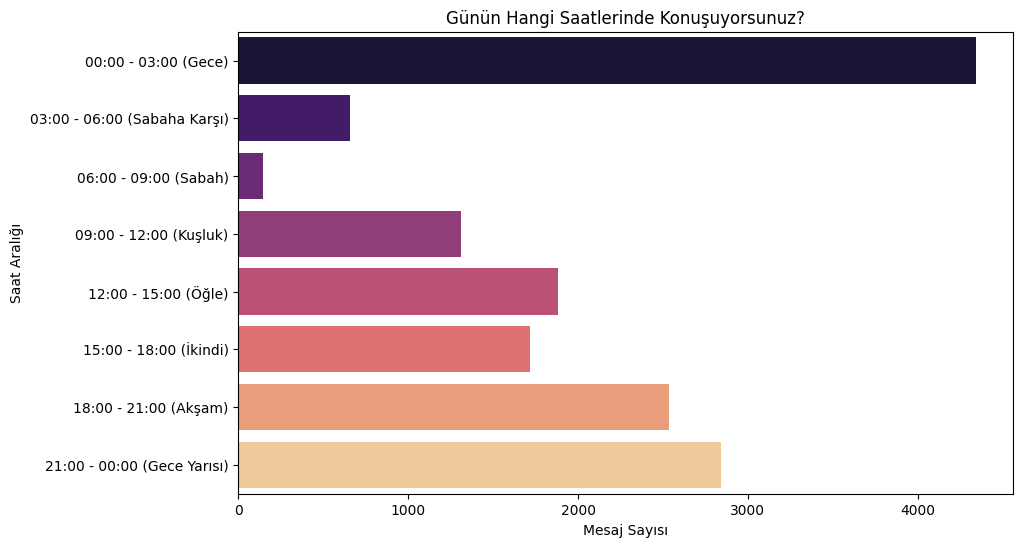


🏆 En aktif olduğunuz saat aralığı: 00:00 - 03:00 (Gece)


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_time_intervals(dataframe):
    print("=== ⏰ ZAMAN DİLİMİ ANALİZİ (3 Saatlik Aralıklar) ===")
    
    # 1. Saat bilgisini çek (HH:MM formatından sadece HH kısmını alıp sayıya çeviriyoruz)
    # Örnek: "14:30" -> 14
    dataframe['Saat_Sayisal'] = dataframe['Saat'].str[:2].astype(int)
    
    # 2. 3'er saatlik dilimleri tanımla
    # bins: Aralıkların sınırları (0, 3, 6, 9...)
    bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
    
    # labels: Bu aralıkların isimleri
    labels = [
        "00:00 - 03:00 (Gece)", 
        "03:00 - 06:00 (Sabaha Karşı)", 
        "06:00 - 09:00 (Sabah)", 
        "09:00 - 12:00 (Kuşluk)", 
        "12:00 - 15:00 (Öğle)", 
        "15:00 - 18:00 (İkindi)", 
        "18:00 - 21:00 (Akşam)", 
        "21:00 - 00:00 (Gece Yarısı)"
    ]
    
    # 3. pd.cut ile saatleri gruplara ayır
    # right=False: Sol sınır dahil, sağ sınır hariç (Örn: 03:00, ikinci dilime dahildir)
    dataframe['Zaman_Dilimi'] = pd.cut(dataframe['Saat_Sayisal'], bins=bins, labels=labels, right=False)
    
    # 4. Sayma İşlemi: Hangi dilimde kaç mesaj var?
    time_stats = dataframe['Zaman_Dilimi'].value_counts().sort_index()
    
    # Sonuçları Yazdır
    print(f"{'ZAMAN DİLİMİ':<35} | {'MESAJ SAYISI'}")
    print("-" * 55)
    for interval, count in time_stats.items():
        # Görsel olarak bar çubuğu ekleyelim (ASCII art)
        bar = "█" * int(count / 5) # Her 5 mesaj için 1 kutu (Ölçekleme)
        print(f"{interval:<35} | {count} {bar}")

    # 5. Basit bir Grafik Çiz (Görselleştirmek her zaman iyidir)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=time_stats.values, y=time_stats.index, palette="magma")
    plt.title("Günün Hangi Saatlerinde Konuşuyorsunuz?")
    plt.xlabel("Mesaj Sayısı")
    plt.ylabel("Saat Aralığı")
    plt.show()
    
    # En yoğun aralığı bulup yazdıralım
    most_active = time_stats.idxmax()
    print(f"\n🏆 En aktif olduğunuz saat aralığı: {most_active}")

# Fonksiyonu çalıştır
analyze_time_intervals(df)

### en çok konuşulan gün

=== 📅 GÜNLÜK AKTİVİTE ANALİZİ ===

🏆 Haftanın Şampiyonu: Pazartesi (3512 mesaj)

--- Günlere Göre Mesaj Dağılımı ---
Pazartesi  | 3512  ███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
Salı       | 1901  ██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
Çarşamba   | 1560  ████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
Perşembe   | 1992  ███████████████████████████████████████████████████████████████████████████████████████████████████████████

/tmp/ipykernel_13/3537672269.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


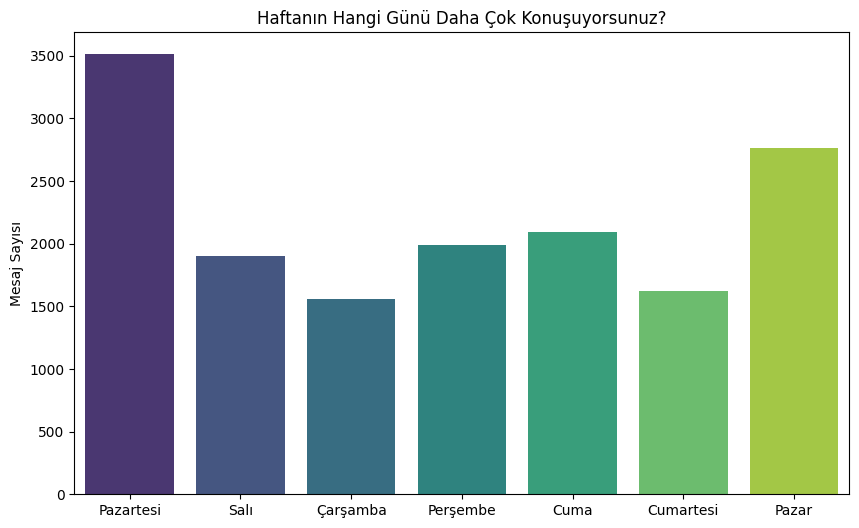

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_daily_activity(dataframe):
    print("=== 📅 GÜNLÜK AKTİVİTE ANALİZİ ===")
    
    # 1. Tarih sütununu gerçek tarih formatına (datetime) çevir
    # format='%d.%m.%Y' -> Gün.Ay.Yıl formatını tanıtır
    dataframe['Tarih_Obj'] = pd.to_datetime(dataframe['Tarih'], format='%d.%m.%Y', errors='coerce')
    
    # 2. Gün isimlerini al (Pandas İngilizce döndürür: Monday, Tuesday...)
    # Türkçeye çevirmek için bir harita (sözlük) kullanalım
    gun_cevirisi = {
        'Monday': 'Pazartesi',
        'Tuesday': 'Salı',
        'Wednesday': 'Çarşamba',
        'Thursday': 'Perşembe',
        'Friday': 'Cuma',
        'Saturday': 'Cumartesi',
        'Sunday': 'Pazar'
    }
    
    # dt.day_name() ile günü bul, map ile Türkçeye çevir
    dataframe['Gun'] = dataframe['Tarih_Obj'].dt.day_name().map(gun_cevirisi)
    
    # 3. Hangi gün kaç mesaj atılmış sayalım
    daily_counts = dataframe['Gun'].value_counts()
    
    # 4. En yoğun günü bul
    if not daily_counts.empty:
        busiest_day = daily_counts.idxmax()
        max_count = daily_counts.max()
        print(f"\n🏆 Haftanın Şampiyonu: {busiest_day} ({max_count} mesaj)")
    else:
        print("Veri bulunamadı.")
        return

    # 5. Sıralama (Grafik düzgün görünsün diye Pazartesi'den Pazar'a manuel sıralayalım)
    ordered_days = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
    
    # Terminal Çıktısı (ASCII Grafik)
    print("\n--- Günlere Göre Mesaj Dağılımı ---")
    for day in ordered_days:
        count = daily_counts.get(day, 0) # O gün mesaj yoksa 0 kabul et
        # Görsel bar (Her 10 mesaj için 1 kutu)
        bar = "█" * int(count / 10) 
        print(f"{day:<10} | {count:<5} {bar}")

    # 6. Profesyonel Grafik (Seaborn)
    plt.figure(figsize=(10, 6))
    # Veriyi sıralı listeye göre çekiyoruz
    sns.barplot(
        x=ordered_days, 
        y=[daily_counts.get(d, 0) for d in ordered_days], 
        palette="viridis"
    )
    plt.title("Haftanın Hangi Günü Daha Çok Konuşuyorsunuz?")
    plt.ylabel("Mesaj Sayısı")
    plt.show()

# Fonksiyonu çalıştır
analyze_daily_activity(df)

### deep talk

In [18]:
import pandas as pd

def find_deep_talks(dataframe):
    print("=== 🧠 DEEP TALK (KESİNTİSİZ SOHBET) ANALİZİ ===")
    
    # 1. Hazırlık: Tarih ve Saati birleştirip tam bir zaman damgası yapalım
    # Şu an 'Tarih' ve 'Saat' ayrı sütunlarda. Pandas hesap yapsın diye birleştiriyoruz.
    # Örn: "15.01.2025" + "14:30" -> 2025-01-15 14:30:00 (datetime objesi)
    dataframe['Tam_Zaman'] = pd.to_datetime(
        dataframe['Tarih'] + ' ' + dataframe['Saat'], 
        format='%d.%m.%Y %H:%M:%S',
        errors='coerce' # Hatalı satır varsa bozma, NaT yap
    )
    
    # Zaman sırasına göre dizelim (Emin olmak için)
    dataframe = dataframe.sort_values('Tam_Zaman')
    
    # 2. Fark Hesaplama: Her mesajın bir önceki mesajla arasındaki zaman farkını bul
    # diff() fonksiyonu bir önceki satırla farkı alır
    dataframe['Fark'] = dataframe['Tam_Zaman'].diff()
    
    # 3. Oturum Belirleme (Sessionization)
    # Kural: Eğer fark 20 dakikadan (1200 saniye) fazlaysa, yeni bir sohbet başlamış demektir.
    threshold = pd.Timedelta(minutes=20)
    
    # 'Yeni_Oturum' sütunu: Fark > 20 dk ise True (1), değilse False (0)
    dataframe['Yeni_Oturum'] = dataframe['Fark'] > threshold
    
    # cumsum() (Kümülatif Toplam) ile her True gördüğünde ID'yi 1 artırır.
    # Böylece her sohbet grubuna benzersiz bir ID veririz (0, 1, 2, 3...)
    dataframe['Oturum_ID'] = dataframe['Yeni_Oturum'].cumsum()
    
    # 4. Gruplama ve Özetleme
    # Her Oturum_ID için başlangıç, bitiş ve mesaj sayısını hesapla
    sessions = dataframe.groupby('Oturum_ID').agg(
        Baslangic=('Tam_Zaman', 'min'),
        Bitis=('Tam_Zaman', 'max'),
        Mesaj_Sayisi=('Mesaj', 'count'),
        Ilk_Mesaj=('Mesaj', 'first') # Sohbetin neyle başladığını görmek için
    )
    
    # Süreyi hesapla (Bitiş - Başlangıç)
    sessions['Sure'] = sessions['Bitis'] - sessions['Baslangic']
    
    # 5. Filtreleme (Gerçek Deep Talk Kriterleri)
    # En az 1 saat sürmüş OLSUN VE en az 50 mesaj atılmış OLSUN
    deep_talks = sessions[
        (sessions['Sure'] > pd.Timedelta(hours=1)) & 
        (sessions['Mesaj_Sayisi'] > 50)
    ].sort_values('Sure', ascending=False) # En uzunu en üste al
    
    # SONUÇLARI YAZDIR
    if not deep_talks.empty:
        top_session = deep_talks.iloc[0] # En üstteki (Rekor)
        
        # Süreyi güzelleştir (Sadece saniye görmek yerine Saat:Dakika görelim)
        total_seconds = top_session['Sure'].total_seconds()
        hours = int(total_seconds // 3600)
        minutes = int((total_seconds % 3600) // 60)
        
        print(f"\n🏆 REKOR DEEP TALK:")
        print(f"📅 Tarih: {top_session['Baslangic'].strftime('%d.%m.%Y')}")
        print(f"⏱️ Süre: {hours} Saat {minutes} Dakika")
        print(f"💬 Mesaj Sayısı: {top_session['Mesaj_Sayisi']} adet")
        print(f"⏰ Başlangıç: {top_session['Baslangic'].strftime('%H:%M')}")
        print(f"🏁 Bitiş: {top_session['Bitis'].strftime('%H:%M')}")
        
        print("\n--- Diğer Uzun Sohbetler (Top 5) ---")
        for i, (idx, row) in enumerate(deep_talks.head(5).iterrows()):
            secs = row['Sure'].total_seconds()
            h = int(secs // 3600)
            m = int((secs % 3600) // 60)
            print(f"{i+1}. {row['Baslangic'].strftime('%d.%m.%Y')} | {h} sa {m} dk | {row['Mesaj_Sayisi']} mesaj")
            
    else:
        print("Henüz kriterlere uyan (1 saatten uzun ve 50 mesajdan fazla) bir Deep Talk bulunamadı.")
        print("Belki kriterleri (süre veya mesaj sayısı) düşürmelisin.")

# Fonksiyonu çalıştır
find_deep_talks(df)

=== 🧠 DEEP TALK (KESİNTİSİZ SOHBET) ANALİZİ ===

🏆 REKOR DEEP TALK:
📅 Tarih: 16.11.2025
⏱️ Süre: 4 Saat 16 Dakika
💬 Mesaj Sayısı: 520 adet
⏰ Başlangıç: 15:45
🏁 Bitiş: 20:02

--- Diğer Uzun Sohbetler (Top 5) ---
1. 16.11.2025 | 4 sa 16 dk | 520 mesaj
2. 16.11.2025 | 3 sa 44 dk | 223 mesaj
3. 06.11.2025 | 3 sa 25 dk | 326 mesaj
4. 10.10.2025 | 3 sa 23 dk | 90 mesaj
5. 03.12.2025 | 3 sa 4 dk | 81 mesaj


### ortalama cevap süresi

In [20]:
import pandas as pd

def get_average_response_time(dataframe):
    print("=== ⚡ ORTALAMA CEVAP SÜRESİ ANALİZİ ===")
    
    # 1. Tarih ve Saati birleştirip zaman damgası yap
    dataframe['Tam_Zaman'] = pd.to_datetime(
        dataframe['Tarih'] + ' ' + dataframe['Saat'], 
        format='%d.%m.%Y %H:%M:%S',
        errors='coerce'
    )
    
    # 2. Zamana göre sırala (Kronolojik sıra şart)
    dataframe = dataframe.sort_values('Tam_Zaman')
    
    # 3. Bir önceki mesajın kime ait olduğunu ve zamanını al
    dataframe['Onceki_Gonderen'] = dataframe['Gonderen'].shift(1)
    dataframe['Onceki_Zaman'] = dataframe['Tam_Zaman'].shift(1)
    
    # 4. Sadece "Cevap" olan satırları bul
    # Kural: Gönderen kişi, bir önceki gönderenden farklıysa bu bir cevaptır.
    replies = dataframe[dataframe['Gonderen'] != dataframe['Onceki_Gonderen']].copy()
    
    # 5. Süreyi hesapla
    replies['Cevap_Suresi'] = replies['Tam_Zaman'] - replies['Onceki_Zaman']
    
    # --- FİLTRELEME ---
    # Eğer cevap süresi 12 saatten fazlaysa, bu bir cevap değil "yeni konu"dur.
    # Ortalamayı bozmaması için bunları çıkarıyoruz.
    valid_replies = replies[replies['Cevap_Suresi'] < pd.Timedelta(hours=12)]
    
    # 6. Hesaplama ve Yazdırma
    users = dataframe['Gonderen'].unique()
    
    print(f"{'KİŞİ':<30} | {'ORTALAMA DÖNÜŞ HIZI'}")
    print("-" * 60)
    
    for user in users:
        # Kişinin cevaplarını filtrele
        user_replies = valid_replies[valid_replies['Gonderen'] == user]
        
        if not user_replies.empty:
            avg_time = user_replies['Cevap_Suresi'].mean()
            
            # Saniye cinsinden toplam süre
            total_seconds = avg_time.total_seconds()
            
            # Dakika ve Saniye hesabı
            minutes = int(total_seconds // 60)
            seconds = int(total_seconds % 60)
            
            print(f"{user:<30} | {minutes} dakika {seconds} saniye")
        else:
            print(f"{user:<30} | (Hesaplanan veri yok)")

# Fonksiyonu çalıştır
get_average_response_time(df)

=== ⚡ ORTALAMA CEVAP SÜRESİ ANALİZİ ===
KİŞİ                           | ORTALAMA DÖNÜŞ HIZI
------------------------------------------------------------
Hümeyra Demirbaş ÖNDER Mars    | 11 dakika 33 saniye
Mustafa Özgör                  | 9 dakika 47 saniye


### silinen ve düzenlenen mnesajlar

In [21]:
import pandas as pd

def analyze_special_actions(dataframe):
    # Aranacak hedefler ve anahtar kelimeler
    # WhatsApp sürümlerine göre bazen "ileti", bazen "mesaj" yazar, ikisini de kapsayalım.
    targets = {
        "🗑️ SİLİNEN MESAJLAR": ["bu mesaj silindi", "bu ileti silindi"],
        "🎨 ÇIKARTMA (STICKER) SAYISI": ["çıkartma dahil edilmedi", "sticker dahil edilmedi"],
        "✏️ DÜZENLENEN MESAJLAR": ["bu mesaj düzenlendi", "bu ileti düzenlendi", "<bu ileti düzenlendi>"]
    }
    
    print("=== 🕵️ ÖZEL AKSİYON ANALİZİ ===")
    
    for title, keywords in targets.items():
        print(f"\n{title}")
        print("-" * 50)
        
        # Anahtar kelimelerden herhangi biri geçiyor mu diye bak (Regex ile)
        # case=False: Büyük/küçük harf duyarlılığını kapatır
        pattern = "|".join(keywords)
        subset = dataframe[dataframe['Mesaj'].str.contains(pattern, case=False, na=False)]
        
        if not subset.empty:
            # Kişilere göre say
            counts = subset['Gonderen'].value_counts()
            
            # Lideri bul
            leader_name = counts.idxmax()
            leader_count = counts.max()
            
            print(f"🏆 LİDER: {leader_name} ({leader_count} adet)")
            print("\nDetaylı Sıralama:")
            print(counts.to_string())
        else:
            print("Bu kategoride hiç veri bulunamadı (Veya filtrelenmiş olabilir).")

# Fonksiyonu çalıştır
analyze_special_actions(df)

=== 🕵️ ÖZEL AKSİYON ANALİZİ ===

🗑️ SİLİNEN MESAJLAR
--------------------------------------------------
🏆 LİDER: Hümeyra Demirbaş ÖNDER Mars (13 adet)

Detaylı Sıralama:
Gonderen
Hümeyra Demirbaş ÖNDER Mars    13

🎨 ÇIKARTMA (STICKER) SAYISI
--------------------------------------------------
🏆 LİDER: Hümeyra Demirbaş ÖNDER Mars (351 adet)

Detaylı Sıralama:
Gonderen
Hümeyra Demirbaş ÖNDER Mars    351
Mustafa Özgör                  244

✏️ DÜZENLENEN MESAJLAR
--------------------------------------------------
🏆 LİDER: Hümeyra Demirbaş ÖNDER Mars (150 adet)

Detaylı Sıralama:
Gonderen
Hümeyra Demirbaş ÖNDER Mars    150
Mustafa Özgör                   67


In [22]:
# --- 0. HAZIRLIK: ZAMAN SÜTUNUNU DÜZELTME ---
import pandas as pd

# Tarih ve Saat'i birleştirip datetime objesi yapalım
df['Tam_Zaman'] = pd.to_datetime(
    df['Tarih'] + ' ' + df['Saat'], 
    format='%d.%m.%Y %H:%M:%S', 
    errors='coerce'
)
df = df.sort_values('Tam_Zaman')
print("✅ Zaman verisi hazırlandı.")

✅ Zaman verisi hazırlandı.


### sesli mesaj

In [23]:
import re

def analyze_media_types(dataframe):
    print("=== 🎤 PODCAST VE 🔗 LINK ANALİZİ ===")
    
    # Sesli mesaj kalıpları
    audio_patterns = ["sesli mesaj", "audio omitted", "ptt", "ses kaydı"]
    
    # Link kalıpları (http, www, .com)
    url_pattern = r'(https?://|www\.)\S+'
    
    users = dataframe['Gonderen'].unique()
    
    for user in users:
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str).str.lower()
        
        # Sesli Mesaj Sayısı
        audio_count = user_msgs.apply(lambda x: any(p in x for p in audio_patterns)).sum()
        
        # Link Sayısı
        link_count = user_msgs.str.count(url_pattern).sum()
        
        print(f"\n👤 {user}:")
        print(f"   🎤 {audio_count} adet sesli mesaj (Podcastçi!)")
        print(f"   🔗 {link_count} adet link paylaştı (Influencer!)")

analyze_media_types(df)

=== 🎤 PODCAST VE 🔗 LINK ANALİZİ ===

👤 Hümeyra Demirbaş ÖNDER Mars:
   🎤 1 adet sesli mesaj (Podcastçi!)
   🔗 17 adet link paylaştı (Influencer!)

👤 Mustafa Özgör:
   🎤 1 adet sesli mesaj (Podcastçi!)
   🔗 26 adet link paylaştı (Influencer!)


### gülüş stili analizi

In [24]:
def analyze_laugh_style(dataframe):
    print("\n=== 😂 GÜLÜŞ STİLİ ANALİZİ ===")
    
    # Regex Desenleri
    patterns = {
        "Random (asdasd)": r'(?:[asdfghjklşi]{4,})',  # Klavye orta sıra tuşlarına basma
        "Klasik (hahaha)": r'(?:ha){3,}|(?:he){3,}|(?:eh){3,}', # ha-he tekrarları
        "Kısa (lol/kdkd)": r'\b(lol|kdkd|sjsj)\b'
    }
    
    users = dataframe['Gonderen'].unique()
    
    for user in users:
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str).str.lower()
        print(f"\n👤 {user} Gülüş Profili:")
        
        total_laughs = 0
        for style, pattern in patterns.items():
            count = user_msgs.str.count(pattern).sum()
            if count > 0:
                print(f"   - {style}: {count} kez")
                total_laughs += count
        
        if total_laughs == 0:
            print("   - (Çok ciddi biri, hiç gülmemiş)")

analyze_laugh_style(df)


=== 😂 GÜLÜŞ STİLİ ANALİZİ ===

👤 Hümeyra Demirbaş ÖNDER Mars Gülüş Profili:
   - Random (asdasd): 2883 kez
   - Klasik (hahaha): 5 kez

👤 Mustafa Özgör Gülüş Profili:
   - Random (asdasd): 3833 kez
   - Klasik (hahaha): 14 kez
   - Kısa (lol/kdkd): 2 kez


### sohbet başlatma

In [25]:
def analyze_initiator(dataframe):
    print("\n=== 🚀 SOHBET BAŞLATICI (ICE BREAKER) ===")
    
    # Mesajlar arası farkı al
    dataframe['Fark'] = dataframe['Tam_Zaman'].diff()
    
    # 6 Saatlik (360 dakika) sessizlikten sonra atılan mesajları bul
    threshold = pd.Timedelta(hours=6)
    initiations = dataframe[dataframe['Fark'] > threshold]
    
    # Say
    counts = initiations['Gonderen'].value_counts()
    
    print("Sessizlikten sonra konuyu kim açıyor?")
    print(counts.to_string())
    
    if not counts.empty:
        print(f"\n🏆 Lider: {counts.idxmax()} (Sohbeti sırtlayan kişi)")

analyze_initiator(df)


=== 🚀 SOHBET BAŞLATICI (ICE BREAKER) ===
Sessizlikten sonra konuyu kim açıyor?
Gonderen
Mustafa Özgör                  98
Hümeyra Demirbaş ÖNDER Mars    79

🏆 Lider: Mustafa Özgör (Sohbeti sırtlayan kişi)


### kelime kalıpları

In [28]:
from collections import Counter
import re

def analyze_clean_bigrams_v2(dataframe):
    print("=== 🧩 DUŞ ALMIŞ TERTEMİZ İKİLİ KELİME (BIGRAM) ANALİZİ ===")
    
    # 1. Stop Words (Gereksiz kelimeler)
    stop_words = set([
        "bir", "ve", "ile", "de", "da", "bu", "o", "ben", "sen", "mı", "mi", "ama", "çok", "var", "yok",
        "için", "gibi", "kadar", "diye", "ne", "nasıl", "neden", "şey", "yani", "zaten", "tamam",
        "peki", "evet", "hayır", "olur", "iyi", "güzel", "kötü", "bunu", "şunu", "onu", "bana", "sana",
        "şimdi", 'sonra', 'önce', 'daha', 'en', 'az', 'biraz', 'bile', 'ise', 'tüm', 'her', 'hiç',
        'sadece', 'veya', 'ya', 'hem', 'böyle', 'öyle', 'zaman', 'olsun', 'olsa', 'hani', 'işte',
        'falan', 'filan', 'tmm', 'ok', 'oke', 'aynen', 'tabii', 'tabi', 'bi', 'be'
    ])

    # 2. Yasaklı İkililer (Blacklist) - BURAYI GÜNCELLEDİK
    # Senin çıktındaki hatalı kalıpları buraya ekledim
    blacklist_phrases = [
        "dahil edilmedi", "çıkartma dahil", "mesaj düzenlendi", 
        "mesaj bekleniyor", "mesaj silindi", "bu mesaj", "bu ileti",
        "uçtan uca", "uca şifreli", "araması cevapsız", "görüntülü arama",
        "bekleniyor alabilir", "zaman alabilir", "işlem biraz", # Şifreleme hatası için
        "ses dahil", "video dahil", "görüntü dahil", # Medya hataları için
        "mesajı sildiniz", "sildiniz", # Silme uyarısı
        "hadi demek" # Senin çıktıda garip duruyordu, istersen çıkarabilirsin ama anlamsız duruyor
    ]

    users = dataframe['Gonderen'].unique()
    
    for user in users:
        # Mesajları al ve birleştir
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str).str.lower()
        
        valid_bigrams = []
        
        for msg in user_msgs:
            # Önce mesajın kendisi yasaklı bir kalıp içeriyor mu diye bak (Örn: "Mesaj bekleniyor...")
            if "bekleniyor" in msg and "alabilir" in msg:
                continue
            if "sildiniz" in msg:
                continue

            # Temizlik
            msg_clean = re.sub(r'[^\w\s]', '', msg)
            words = [w for w in msg_clean.split() if w not in stop_words and len(w) > 2]
            
            # İkilileri oluştur
            bigrams = list(zip(words, words[1:]))
            
            for bg in bigrams:
                phrase = f"{bg[0]} {bg[1]}"
                
                # Yasaklı listede var mı kontrol et
                if any(bad in phrase for bad in blacklist_phrases):
                    continue
                
                valid_bigrams.append(phrase)
        
        # Sayma ve Yazdırma
        if valid_bigrams:
            # Top 5 yerine Top 10'a bakalım, aradan güzelleri seçersin
            counts = Counter(valid_bigrams).most_common(10) 
            print(f"\n👤 {user} konuşma kalıpları:")
            for phrase, count in counts:
                print(f"   -> \"{phrase}\" ({count} kez)")
        else:
            print(f"\n👤 {user}: Yeterli veri yok.")

analyze_clean_bigrams_v2(df)

=== 🧩 DUŞ ALMIŞ TERTEMİZ İKİLİ KELİME (BIGRAM) ANALİZİ ===

👤 Hümeyra Demirbaş ÖNDER Mars konuşma kalıpları:
   -> "aleykum selam" (30 kez)
   -> "selamun aleykum" (13 kez)
   -> "teşekkür ederim" (11 kez)
   -> "genel olarak" (10 kez)
   -> "eline sağlık" (9 kez)
   -> "çabana sağlık" (9 kez)
   -> "nereden çıktı" (9 kez)
   -> "kusura bakma" (8 kez)
   -> "fark ettim" (8 kez)
   -> "ona göre" (8 kez)

👤 Mustafa Özgör konuşma kalıpları:
   -> "sağ olasın" (28 kez)
   -> "teşekkür ediyorum" (18 kez)
   -> "allah razı" (17 kez)
   -> "eline sağlık" (16 kez)
   -> "sorun değil" (16 kez)
   -> "kusura bakma" (12 kez)
   -> "genel olarak" (10 kez)
   -> "fark ettim" (10 kez)
   -> "tam olarak" (10 kez)
   -> "hümeyra hanım" (10 kez)


### soru-cevap

In [29]:
def analyze_questions_and_length(dataframe):
    print("\n=== ❓ SORU VE 📖 ANLATIM ANALİZİ ===")
    
    users = dataframe['Gonderen'].unique()
    
    for user in users:
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str)
        
        # Soru Sayısı (? işareti say)
        question_count = user_msgs.str.count(r'\?').sum()
        
        # Ortalama Kelime Sayısı
        # Her mesajdaki boşluk sayısını sayıp +1 ekleyerek kelime sayısını buluruz
        avg_words = user_msgs.apply(lambda x: len(x.split())).mean()
        
        print(f"\n👤 {user}:")
        print(f"   ❓ Toplam {question_count} soru sordu.")
        print(f"   📖 Mesaj başına ortalama {avg_words:.1f} kelime yazdı.")

analyze_questions_and_length(df)


=== ❓ SORU VE 📖 ANLATIM ANALİZİ ===

👤 Hümeyra Demirbaş ÖNDER Mars:
   ❓ Toplam 85 soru sordu.
   📖 Mesaj başına ortalama 4.3 kelime yazdı.

👤 Mustafa Özgör:
   ❓ Toplam 122 soru sordu.
   📖 Mesaj başına ortalama 4.9 kelime yazdı.


### peak day

In [30]:
def analyze_peak_day(dataframe):
    print("\n=== 📅 YILIN EN UNUTULMAZ GÜNÜ ===")
    
    # Tarihlere göre grupla
    daily_counts = dataframe['Tarih'].value_counts()
    
    # En tepe günü bul
    peak_date = daily_counts.idxmax()
    msg_count = daily_counts.max()
    
    print(f"🏆 Rekor Tarih: {peak_date}")
    print(f"💬 Mesaj Sayısı: {msg_count}")
    print("O gün ne olmuştu acaba? 🤔")

analyze_peak_day(df)


=== 📅 YILIN EN UNUTULMAZ GÜNÜ ===
🏆 Rekor Tarih: 16.11.2025
💬 Mesaj Sayısı: 1169
O gün ne olmuştu acaba? 🤔


### kelime haznesi

In [31]:
def analyze_vocabulary(dataframe):
    print("\n=== 📚 KELİME HAZİNESİ ANALİZİ ===")
    
    users = dataframe['Gonderen'].unique()
    
    for user in users:
        text = " ".join(dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str)).lower()
        text = re.sub(r'[^\w\s]', '', text) # Temizlik
        words = text.split()
        
        total_words = len(words)
        unique_words = len(set(words)) # set() benzersizleri alır
        
        if total_words > 0:
            ratio = (unique_words / total_words) * 100
            print(f"\n👤 {user}:")
            print(f"   - Toplam Kelime: {total_words}")
            print(f"   - Benzersiz Kelime: {unique_words}")
            print(f"   - Kelime Çeşitliliği: %{ratio:.1f}")
            
            if ratio > 15:
                print("   (Edebiyat parçalamış! 📜)")
            else:
                print("   (Hep aynı kelimeleri kullanmış 🔁)")

analyze_vocabulary(df)


=== 📚 KELİME HAZİNESİ ANALİZİ ===

👤 Hümeyra Demirbaş ÖNDER Mars:
   - Toplam Kelime: 32352
   - Benzersiz Kelime: 9514
   - Kelime Çeşitliliği: %29.4
   (Edebiyat parçalamış! 📜)

👤 Mustafa Özgör:
   - Toplam Kelime: 37524
   - Benzersiz Kelime: 10670
   - Kelime Çeşitliliği: %28.4
   (Edebiyat parçalamış! 📜)


### yılın enleri

In [35]:
import pandas as pd

def analyze_milestones(dataframe):
    print("=== 🏆 YILIN EN'LERİ VE TARİH YAZANLAR ===")
    
    # 1. EN GEÇ SAATTE ATILAN MESAJ
    # Mantık: 00:00 - 06:00 arası saatleri "24:00 - 30:00" gibi düşünüp sıralayacağız.
    # Böylece 04:00, 23:00'dan daha "büyük" (geç) sayılacak.
    
    def shift_time(t_str):
        if pd.isna(t_str): return -1
        hour = int(t_str[:2])
        minute = int(t_str[3:5])
        # Gece 00-06 arasını günün sonu olarak ekle (+24 saat)
        if 0 <= hour < 6:
            hour += 24
        return hour * 60 + minute

    # Geçici bir skor sütunu oluştur
    dataframe['Gece_Skoru'] = dataframe['Saat'].apply(shift_time)
    
    # Skoru en yüksek olan (En geç saatte atılan) mesajı bul
    latest_msg_row = dataframe.loc[dataframe['Gece_Skoru'].idxmax()]
    
    print(f"\n🦉 EN GEÇ SAATTE ATILAN MESAJ:")
    print(f"   👤 Gönderen: {latest_msg_row['Gonderen']}")
    print(f"   ⏰ Saat: {latest_msg_row['Saat']} (Uyumamış!)")
    print(f"   📅 Tarih: {latest_msg_row['Tarih']}")
    print(f"   📩 Mesaj: \"{latest_msg_row['Mesaj']}\"")

    # 2. 1000. MESAJI ATAN KİŞİ (JÜBİLE)
    # Eğer toplam mesaj 1000'den fazlaysa
    if len(dataframe) >= 1000:
        # İndeks 0'dan başladığı için 999. indeks 1000. mesajdır
        milestone_msg = dataframe.iloc[999]
        print(f"\n🎉 1000. MESAJI ATAN JÜBİLE İSMİ:")
        print(f"   👤 {milestone_msg['Gonderen']}")
        print(f"   📅 {milestone_msg['Tarih']} tarihinde tarihe geçti.")
    else:
        print(f"\n🎉 1000. Mesaj: Henüz 1000 mesaja ulaşılmamış (Toplam: {len(dataframe)})")


# Fonksiyonu çalıştır
analyze_milestones(df)

=== 🏆 YILIN EN'LERİ VE TARİH YAZANLAR ===

🦉 EN GEÇ SAATTE ATILAN MESAJ:
   👤 Gönderen: Mustafa Özgör
   ⏰ Saat: 05:53:10 (Uyumamış!)
   📅 Tarih: 25.08.2025
   📩 Mesaj: "Ndndjdjdkdk"

🎉 1000. MESAJI ATAN JÜBİLE İSMİ:
   👤 Hümeyra Demirbaş ÖNDER Mars
   📅 3.07.2025 tarihinde tarihe geçti.


### caps-lock analizi

In [36]:
import re

def analyze_caps_lock(dataframe):
    print("\n=== 📢 CAPS LOCK BAĞIMLISI (HEYECAN ANALİZİ) ===")
    
    users = dataframe['Gonderen'].unique()
    
    print(f"{'KİŞİ':<30} | {'BAĞIRAN MESAJ SAYISI'} | {'ORAN'}")
    print("-" * 65)
    
    caps_counts = {}
    
    for user in users:
        # Kullanıcının mesajlarını al
        user_msgs = dataframe[dataframe['Gonderen'] == user]['Mesaj'].astype(str)
        
        shout_count = 0
        total_valid_msgs = 0
        
        for msg in user_msgs:
            # Sadece harflerden oluşan temiz bir versiyon yap
            # Rakamları ve emojileri sayma ki oran bozulmasın
            clean_msg = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ]', '', msg)
            
            # En az 4 harfli mesajları analiz et (OK, TM gibi kısaları ele)
            if len(clean_msg) > 3:
                total_valid_msgs += 1
                
                # Büyük harf sayısı
                upper_count = sum(1 for c in clean_msg if c.isupper())
                
                # Eğer harflerin %80'inden fazlası büyükse -> BAĞIRIYOR DEMEKTİR
                if upper_count / len(clean_msg) > 0.8:
                    shout_count += 1
        
        # Sonuçları kaydet
        caps_counts[user] = shout_count
        
        # Yazdır
        ratio_str = f"({shout_count}/{total_valid_msgs})" if total_valid_msgs > 0 else "(0)"
        print(f"{user:<30} | {shout_count:<20} | {ratio_str}")

    # Lideri bul
    if caps_counts:
        winner = max(caps_counts, key=caps_counts.get)
        count = caps_counts[winner]
        if count > 0:
            print(f"\n🏆 Grubun Megafonu: {winner} ({count} kez bağırdı!) 📣")
        else:
            print("\n🕊️ Grupta kimse bağırmıyor, herkes çok sakin.")

# Fonksiyonu çalıştır
analyze_caps_lock(df)


=== 📢 CAPS LOCK BAĞIMLISI (HEYECAN ANALİZİ) ===
KİŞİ                           | BAĞIRAN MESAJ SAYISI | ORAN
-----------------------------------------------------------------
Hümeyra Demirbaş ÖNDER Mars    | 34                   | (34/7375)
Mustafa Özgör                  | 23                   | (23/7530)

🏆 Grubun Megafonu: Hümeyra Demirbaş ÖNDER Mars (34 kez bağırdı!) 📣
